## PCA (Principal Component analysis)

##### Step 0 : 필요한 library를 import합니다.

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sb
import matplotlib.pyplot as plt

##### Step 1 : 각각의 변수들의 평균을 빼줍니다
- 데이터셋에서 각각 변수들의 평균을 빼주어 원점에 centering 되게 맞춰줍니다. 해당 과정을 진행해주면 covariance matrix를 구할 시 유용합니다.

In [2]:
# dummy dataset 생성
# randint를 이용하여 100개의 정수 난수를 생성하고, 20x5 행렬로 reshape해줍니다.
np.random.seed(42)
X = np.random.randint(20,70,100).reshape(20,5) 
X

array([[58, 48, 34, 62, 27],
       [40, 58, 38, 42, 30],
       [30, 43, 55, 59, 43],
       [22, 41, 21, 43, 63],
       [49, 57, 21, 40, 52],
       [31, 41, 63, 44, 68],
       [46, 61, 47, 35, 34],
       [66, 63, 22, 56, 26],
       [40, 28, 58, 37, 23],
       [44, 33, 69, 28, 45],
       [21, 39, 47, 66, 26],
       [63, 27, 66, 54, 33],
       [36, 55, 69, 59, 23],
       [21, 25, 61, 23, 48],
       [37, 45, 63, 53, 29],
       [55, 33, 50, 67, 34],
       [27, 33, 42, 59, 40],
       [35, 64, 37, 66, 43],
       [45, 44, 64, 60, 48],
       [34, 64, 20, 44, 26]])

In [3]:
# 데이터에 대해 scaling을 진행해줍니다. (StandardScaler와 동일한 효과)
X_scaled = (X - X.mean(axis = 0))/X.std(axis = 0)
X_scaled

array([[ 1.38175672,  0.22778225, -0.79791841,  0.95451314, -0.86965423],
       [ 0.        ,  1.0132383 , -0.55884173, -0.61670191, -0.63354901],
       [-0.76764262, -0.16494577,  0.45723414,  0.71883088,  0.38957362],
       [-1.38175672, -0.32203698, -1.5749176 , -0.53814115,  1.96360843],
       [ 0.69087836,  0.9346927 , -1.5749176 , -0.77382341,  1.09788928],
       [-0.69087836, -0.32203698,  0.93538749, -0.4595804 ,  2.35711713],
       [ 0.46058557,  1.24887512, -0.02091921, -1.16662717, -0.31874205],
       [ 1.99587081,  1.40596633, -1.51514843,  0.48314863, -0.94835597],
       [ 0.        , -1.34312984,  0.63654165, -1.00950567, -1.1844612 ],
       [ 0.30705705, -0.95040182,  1.29400251, -1.71655244,  0.5469771 ],
       [-1.45852098, -0.47912819, -0.02091921,  1.26875615, -0.94835597],
       [ 1.76557803, -1.42167545,  1.114695  ,  0.32602712, -0.39744379],
       [-0.30705705,  0.77760149,  1.29400251,  0.71883088, -1.1844612 ],
       [-1.45852098, -1.57876666,  0.8

In [4]:
X_scaled.shape

(20, 5)

##### Step 2 : Covariance Matrix를 계산해줍니다
- scaling된 데이터의 covariance matrix를 구해줍니다. covariance matrix는 각각의 element들에 대한 covariance를 표현한 square matrix입니다. 각 element 자신과의 covariance는 분산으로 표현됩니다.

In [5]:
# scaling된 데이터의 covariance matrix를 구해줍니다
covariance = np.cov(X_scaled , rowvar = False)
covariance

array([[ 1.05263158e+00,  1.92943853e-01, -8.30694123e-02,
         1.88537419e-01, -3.58991163e-01],
       [ 1.92943853e-01,  1.05263158e+00, -6.03800397e-01,
         1.71899976e-01, -2.00123621e-01],
       [-8.30694123e-02, -6.03800397e-01,  1.05263158e+00,
        -7.90699320e-02,  6.56075512e-04],
       [ 1.88537419e-01,  1.71899976e-01, -7.90699320e-02,
         1.05263158e+00, -3.02911718e-01],
       [-3.58991163e-01, -2.00123621e-01,  6.56075512e-04,
        -3.02911718e-01,  1.05263158e+00]])

- covariance matrix는 5x5 행렬입니다.

In [6]:
covariance.shape

(5, 5)

##### Step 3: eigenvalue와 eigenvector 계산
- 구한 covariance matrix에서 eignevalue와 eigenvector값들을 구해줍니다.
각각의 vector들은 principal축을 의미합니다.
- Eigen value에 대한 고찰 : 더 높은 eigenvalue값은 더 높은 variability와 대응되며, 더 높은 eigenvalue값을 가지는 principal 축은 데이터 내의 높은 variability를 포착할 수 있습니다.

In [7]:
# Covariance matrix에서 eigenvalue와 eignevector를 구할 수 있습니다
eigen_val = np.linalg.eigh(covariance)[0]
eigen_vec = np.linalg.eigh(covariance)[1]

In [8]:
eigen_val

array([0.41672044, 0.66761697, 0.86813179, 1.36527805, 1.94541066])

In [9]:
eigen_val.shape

(5,)

In [10]:
eigen_vec

array([[-0.00242044, -0.57112447,  0.60631466, -0.37122942, -0.41034405],
       [ 0.70792739,  0.16257249,  0.02182385,  0.39903507, -0.55919918],
       [ 0.67131007,  0.0613415 ,  0.00640153, -0.58570047,  0.44999333],
       [-0.00263353, -0.34874187, -0.78946858, -0.33713159, -0.37610347],
       [ 0.21947393, -0.722498  , -0.09276115,  0.49624287,  0.41828963]])

In [11]:
eigen_vec.shape

(5, 5)

##### Step 4 : Eigenvalue값들을 내림차순으로 정렬
- eigenvector matrix에서 각 column은 principal component와 대응되며 eigenvalue값을 기준으로 내림차순으로 정렬합니다.
재정렬된 eigen vector matrix의 첫번째 column은 가장 높은 variability값을 포착하는 principal component이고, 순차적으로 높은 variability를 보이게 됩니다.

In [12]:
# 내림차순으로 정렬된 index 만들기
sorted_idx = np.argsort(eigen_val)[::-1]
sorted_idx 

array([4, 3, 2, 1, 0])

In [13]:
# eigenvalue들을 내림차순으로 정렬해줍니다
sorted_eigenval = eigen_val[sorted_idx]
sorted_eigenval

array([1.94541066, 1.36527805, 0.86813179, 0.66761697, 0.41672044])

In [14]:
# 마찬가지로 eigenvector들을 정렬해줍니다
sorted_eigenvec = eigen_vec[:,sorted_idx]
sorted_eigenvec

array([[-0.41034405, -0.37122942,  0.60631466, -0.57112447, -0.00242044],
       [-0.55919918,  0.39903507,  0.02182385,  0.16257249,  0.70792739],
       [ 0.44999333, -0.58570047,  0.00640153,  0.0613415 ,  0.67131007],
       [-0.37610347, -0.33713159, -0.78946858, -0.34874187, -0.00263353],
       [ 0.41828963,  0.49624287, -0.09276115, -0.722498  ,  0.21947393]])

##### Step 5: rearrange된 eigenvalue matrix로부터 부분집합 선택
- 재정렬된 eigenvalue matrix로부터 component 수를 지정해줍니다. 해당 component의 수는 principal component들의 수와 동일합니다.

In [15]:
# 첫 n개의 eigenvector 선택 (n은 원하는 차원)

# 원하는 축소 차원 지정 
n_comps = 2
eigenvec_sub = sorted_eigenvec[:,0:n_comps]

In [16]:
eigenvec_sub.T.shape

(2, 5)

##### Step 6 : 데이터 변환
- Eigenvector의 subset의 Transpose값과 scaling된 데이터의 Transpose값을 dot product하여 데이터를 변환해줍니다. 
dot product의 결과를 transpose하여 나오는 결과는 고차원에서 저차원으로 축소된 데이터입니다.

In [17]:
# 데이터 변환
X_reduced = np.dot(eigenvec_sub.T,X_scaled.T).T
X_reduced

array([[-1.77619232, -0.7080707 ],
       [-0.85114034,  0.625147  ],
       [ 0.50558725, -0.09766734],
       [ 1.06212985,  2.46272573],
       [-0.76460626,  1.84463082],
       [ 2.04330622,  0.90475507],
       [-0.59133597,  0.57474786],
       [-2.86541698,  0.07402751],
       [ 0.92174735, -1.15622283],
       [ 1.86215356, -0.4009926 ],
       [-0.01686107, -0.53584334],
       [ 0.28324407, -2.18275294],
       [-0.49234521, -1.16374002],
       [ 2.96935851,  0.53334902],
       [ 0.12880961, -0.90237777],
       [-0.50981583, -1.5118656 ],
       [ 0.59090808,  0.01232286],
       [-1.26523883,  0.86276413],
       [ 0.36628343, -0.64005307],
       [-1.60057514,  1.40511623]])

In [18]:
# 축소된 차원 확인
X_reduced.shape

(20, 2)

### Principal Component Analysis
- 위의 내용을 기반으로 pca를 수행하는 함수를 정의합니다

In [19]:
import numpy as np
 
def get_PCA(X , num_comps):
     
    #Step1
    X_scaled = (X - X.mean(axis = 0))/(X.std(axis = 0))
     
    #Step2
    covariance = np.cov(X_scaled , rowvar = False)
     
    #Step3
    eigen_val , eigen_vec = np.linalg.eigh(covariance)
     
    #Step4
    sorted_idx = np.argsort(eigen_val)[::-1]
    sorted_eigenval = eigen_val[sorted_idx]
    sorted_eigenvec = eigen_vec[:,sorted_idx]
     
    #Step5
    eigenvec_sub = sorted_eigenvec[:,0:num_comps]
     
    #Step6
    X_reduced = np.dot(eigenvec_sub.T , X_scaled.T).T
     
    return X_reduced

- 데이터셋 : glass의 classification에 이용되는 데이터셋
- 9개의 변수와 glass의 label이 부여되어 있습니다
https://www.kaggle.com/code/slamnz/glass-dataset-principal-components-analysis/data

In [20]:
# 데이터 불러오기
data = pd.read_csv('./data/glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [21]:
# 데이터셋 준비
x = data.iloc[:,0:9]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [22]:
# target 데이터셋 지정
target = data.iloc[:,9]
target

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [23]:
# PCA 함수 지정
mat_reduced = get_PCA(x , 2)
mat_reduced

array([[-1.14844684e+00, -5.28249069e-01],
       [ 5.72794160e-01, -7.58010491e-01],
       [ 9.37960515e-01, -9.27660908e-01],
       [ 1.41750924e-01, -9.59427899e-01],
       [ 3.50271021e-01, -1.08869658e+00],
       [ 2.89587596e-01, -1.32091046e+00],
       [ 2.52080399e-01, -1.11353870e+00],
       [ 1.20018063e-01, -1.21898810e+00],
       [ 2.07673383e-02, -3.21179549e-01],
       [ 2.34672664e-03, -1.06332030e+00],
       [ 3.81620164e-01, -1.37690564e+00],
       [ 1.33226303e-02, -1.10213499e+00],
       [ 3.08999887e-01, -1.41971148e+00],
       [-1.56154882e-01, -1.23303717e+00],
       [ 8.97462375e-02, -1.17848894e+00],
       [ 1.14985420e-01, -1.15756800e+00],
       [-1.73052569e-01, -1.17967372e+00],
       [-1.45471290e+00,  9.86101698e-02],
       [-5.46035993e-01, -2.94968526e-01],
       [ 3.08094642e-01, -7.61376979e-01],
       [-2.05192769e-01, -9.96845388e-01],
       [-1.21320888e+00, -4.35874127e-01],
       [-4.10716304e-02, -1.02547897e+00],
       [ 1.

In [24]:
# 축소된 데이터셋에 대한 Pandas DataFrame 생성
pca_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
# target 변수와 concat시켜 전체 데이터셋 완성
pca_df = pd.concat([pca_df , pd.DataFrame(target)] , axis = 1)
pca_df

,PC1,PC2,Type
0,-1.148447,-0.528249,1
1,0.572794,-0.758010,1
2,0.937961,-0.927661,1
3,0.141751,-0.959428,1
4,0.350271,-1.088697,1
...,...,...,...
209,2.378258,3.054515,7
210,2.392043,3.100965,7
211,1.676316,3.277140,7
212,2.364204,2.750424,7


##### Result analysis
- 기존의 9차원에서 2차원으로 데이터셋이 축소된 것을 확인할 수 있으며, 아래의 plot을 통해 축소된 차원의 데이터셋을 표현하고 각 라벨이 어떻게 부여되어 있는지를 확인할 수 있습니다

In [25]:
x.shape

(214, 9)

In [26]:
mat_reduced.shape

(214, 2)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

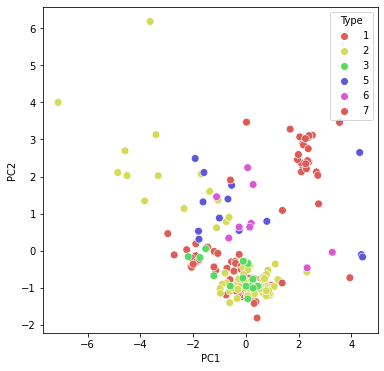

In [27]:
plt.figure(figsize = (6,6))
sb.scatterplot(data = pca_df , x ='PC1',y ='PC2', hue = 'Type' , s = 60 ,palette = 'hls')